# FTSE MIB Stock data manipulation

In [4]:
import os
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import importlib

import DataFunctions as DF

In [5]:
importlib.reload(DF)

<module 'DataFunctions' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\RealDataWork\\DataFunctions.py'>

### 1. Make a list of all stocks


In [6]:
root_folder = r'D:\stockData\FTSE_MIB_stocks_local'

In [7]:
# Take list of all stocks 
years = os.listdir(root_folder)
months = [f"{i:01d}" for i in range(1,13)]
stocks = DF.all_stocks(years, months, root_folder)
print(f"Total stocks number: {len(stocks)}")
print(stocks)

Total stocks number: 43
['A2_MI', 'AMPF_MI', 'AZMT_MI', 'BAMI_MI', 'BCU_MI', 'BGN_MI', 'BMED_MI', 'BMPS_MI', 'BPSI_MI', 'BZU_MI', 'CPRI_MI', 'CRDI_MI', 'DIAS_MI', 'EMII_MI', 'ENEI_MI', 'ENI_MI', 'ERG_MI', 'FBK_MI', 'GASI_MI', 'HRA_MI', 'IG_MI', 'INWT_MI', 'ISP_MI', 'ITPG_MI', 'IVG_MI', 'LDOF_MI', 'MDBI_MI', 'MONC_MI', 'NEXII_MI', 'PIRC_MI', 'PRY_MI', 'PST_MI', 'RACE_MI', 'RECI_MI', 'SFER_MI', 'SPMI_MI', 'SRG_MI', 'STLAM_MI', 'STMMI_MI', 'TENR_MI', 'TLIT_MI', 'TRN_MI', 'UNPI_MI']


### 2. Merge data for each stock

In [8]:
output_folder = r"D:\stockData\FTSE_MIB_stocks_merged"
os.makedirs(output_folder, exist_ok=True)

In [9]:
run = False

if run:
    DF.merge_and_convert(years, months, stocks, root_folder, output_folder)

### 3. Clean Data & compute realized volatility and closing price

In [10]:
root_folder = r'D:\stockData\FTSE_MIB_stocks_merged'
output_folder = r"D:\stockData\FTSE_MIB_rv_and_closing"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
run = False

if run:
    DF.build_rv_closing_per_stock(stocks, root_folder, output_folder)

Check

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


def plot_price_and_rv(
    root_folder: str | Path,
    stock: str | None = None
) -> None:

    root_folder = Path(root_folder)
    file_path = root_folder / f"{stock}.csv"

    df = pd.read_csv(file_path, index_col=0, parse_dates=True)

    if stock is None:
        stock = file_path.stem

    fig, ax1 = plt.subplots(figsize=(10, 5))



    # RV (right axis)
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[f"{stock}_close"], linestyle="--", label="Realized Volatility")
    ax2.set_ylabel("Realized Volatility")
    ax2.tick_params(axis="y")

    # Title & legend
    fig.suptitle(f"{stock} Price & Realized Volatility")

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

    plt.tight_layout()
    plt.show()


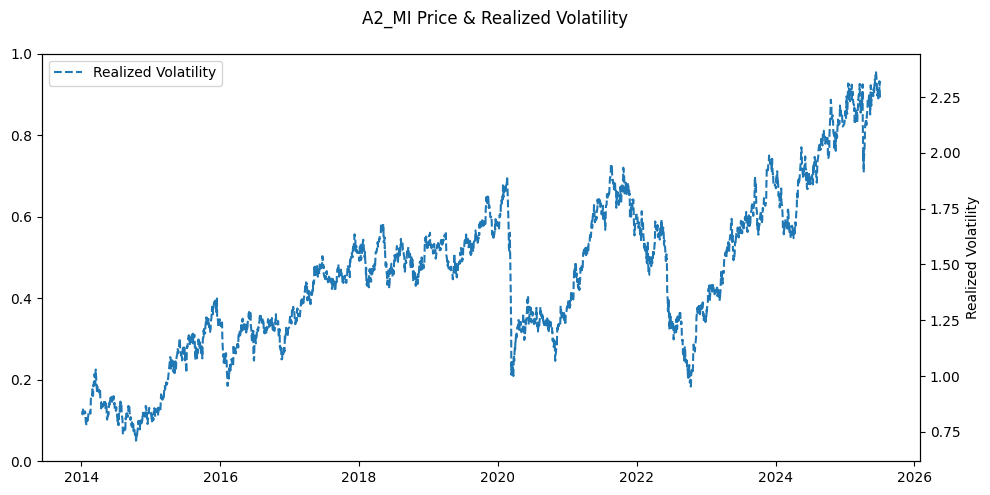

In [13]:
plot_price_and_rv(output_folder, 'A2_MI')